'''
【课程2.4】  数据连续属性离散化

连续属性变换成分类属性，即连续属性离散化
在数值的取值范围内设定若干个离散划分点，将取值范围划分为一些离散化的区间，最后用不同的符号或整数值代表每个子区间中的数据值

等宽法 / 等频法 

'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
<class 'pandas.core.arrays.categorical.Categorical'>
-------
[0 0 0 1 0 0 2 1 3 2 2 1] <class 'numpy.ndarray'>
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]') <class 'pandas.core.indexes.interval.IntervalIndex'>
(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64
[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]
    ages      label
0     20   (18, 25]
1     22   (18, 25]
2     25   (18, 25]
3     27   (25, 35]
4     21   (18, 25]
5     23   (18, 25]
6     37   (35, 60]
7     31   (25, 35]
8     61  (60, 100]
9     45   (35, 60]
10    41   (35, 60]
11    

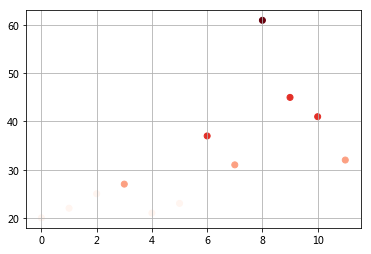

In [12]:
# 等宽法 → 将数据均匀划分成n等份，每份的间距相等
# cut方法

# 有一组人员年龄数据，希望将这些数据划分为“18到25”,“26到35”,“36到60”,“60以上”几个面元
ages=[20,22,25,27,21,23,37,31,61,45,41,32]

bins = [18,25,35,60,100]
cats = pd.cut(ages,bins)                          # 返回的是一个特殊的Categorical对象 → 一组表示面元名称的字符串
print(cats)
print(type(cats))
print('-------')

print(cats.codes,type(cats.codes))                # 0-3对应分组后的四个区间，用代号来注释数据对应区间，结果为ndarray
print(cats.categories,type(cats.categories))      # 四个区间，结果为index
print(cats.value_counts())                        # 按照区间计数
                                                  # cut结果含有一个表示不同分类名称的层级数组以及一个年龄数据进行标号的代号属性
print(pd.cut(ages,[18,26,36,61,100],right=False)) # 通过right函数修改闭端，默认为True

df = pd.DataFrame({'ages':ages})
group_names=['Youth','YoungAdult','MiddleAged','Senior']
s = pd.cut(df['ages'],bins)
df['label'] = s
cut_counts = s.value_counts(sort=False)           # 对一个Dataframe数据进行离散化，并计算各个区间的数据计数
print(df)
print(cut_counts)

plt.scatter(df.index,df['ages'],cmap='Reds',c=cats.codes)  # 用散点图表示，其中颜色按照codes分类
                                                           # codes是来自于Categorical对象
plt.grid()

0    (-3.126, -0.62]
1    (-0.62, 0.0624]
2    (0.0624, 0.665]
3     (0.665, 3.276]
4     (0.665, 3.276]
dtype: category
Categories (4, interval[float64]): [(-3.126, -0.62] < (-0.62, 0.0624] < (0.0624, 0.665] < (0.665, 3.276]]
(0.665, 3.276]     250
(0.0624, 0.665]    250
(-0.62, 0.0624]    250
(-3.126, -0.62]    250
dtype: int64


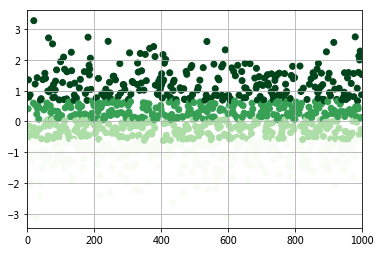

In [16]:
# 等频法 → 以相同数量的记录放进每个区间
# qcut方法

data = np.random.randn(1000)
s = pd.Series(data)
cats = pd.qcut(s,4)                                               # 按四分位数进行切割
print(cats.head())
print(pd.value_counts(cats))

'''
 qcut → 根据样本分位数对数据进行面元划分，得到大小基本相等的面元，但并不能保证每个面元含有相同数据个数
 也可以设置自定义的分位数（0到1之间的数值，包含端点） → pd.qcut(data1,[0,0.1,0.5,0.9,1])
'''

plt.scatter(s.index,s,cmap='Greens',c = pd.qcut(data,4).codes)   # 用散点图表示，其中颜色按照codes分类
plt.xlim([0,1000])
plt.grid()